In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

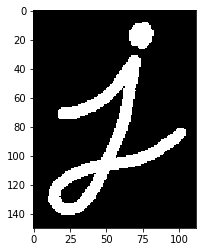

In [2]:
img=cv2.imread('i.png')
plt.imshow(img)
plt.show()

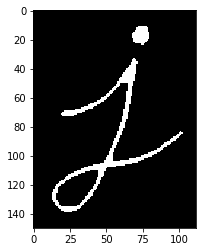

In [3]:
# 腐蚀
img=cv2.imread('i.png')
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.imshow(erosion)
plt.show()

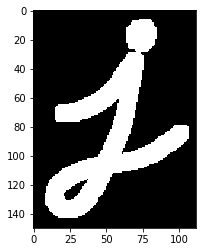

In [4]:
# 膨胀
img=cv2.imread('i.png')
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(dilation)
plt.show()

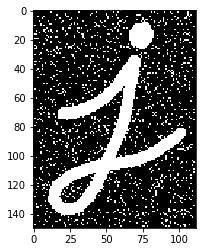

In [5]:
import random


def SaltAndPepper(src,percetage,x,y):  
    SP_NoiseImg=src 
    SP_NoiseNum=int(percetage*src.shape[0]*src.shape[1]) 
    for i in range(SP_NoiseNum): 
        randX=random.randrange(0,src.shape[0]-1) 
        randY=random.randrange(0,src.shape[1]-1) 
        if random.randrange(0,1)==0: 
            SP_NoiseImg[randX,randY]=x
        else: 
            SP_NoiseImg[randX,randY]=y
    return SP_NoiseImg

img=cv2.imread('i.png')
SaltAndPepper_noiseImage = SaltAndPepper(img,0.1,255,0)
plt.imshow(SaltAndPepper_noiseImage)
plt.show()

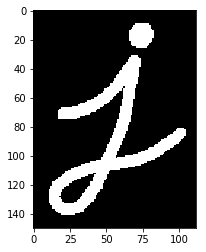

In [6]:
# 开运算（去噪）
opening = cv2.morphologyEx(SaltAndPepper_noiseImage, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)
plt.show()

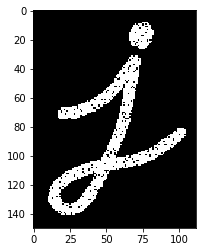

In [7]:
img=cv2.imread('i.png')
SaltAndPepper_noiseImage = SaltAndPepper(img,0.1,0,255)
plt.imshow(SaltAndPepper_noiseImage)
plt.show()

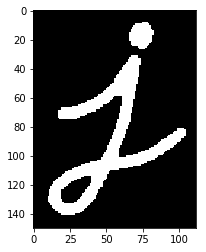

In [8]:
# 闭运算
closing = cv2.morphologyEx(SaltAndPepper_noiseImage, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)
plt.show()

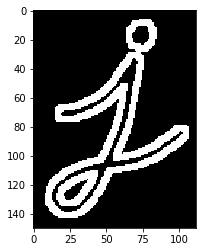

In [9]:
# 形态学梯度
img=cv2.imread('i.png')
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient)
plt.show()

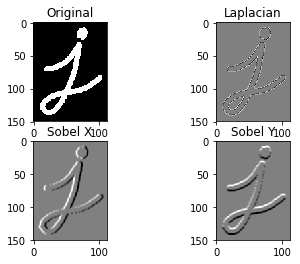

In [15]:
# 高通滤波器：Sobel，Scharr 和 Laplacian
img=cv2.imread('i.png',0)

#cv2.CV_64F 输出图像的深度（数据类型），可以使用-1, 与原图像保持一致 np.uint8
laplacian=cv2.Laplacian(img,cv2.CV_64F)
# 参数 1,0 为只在 x 方向求一阶导数，最大可以求 2 阶导数。
sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
# 参数 0,1 为只在 y 方向求一阶导数，最大可以求 2 阶导数。
sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original')
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian')
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X')
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y')
plt.show()